In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

In [7]:
# Load the dataset
df = pd.read_csv('/Users/azhar/Documents/python learning/pandas_project/Practice Project/medical_insurance_dataset.csv', header=None)

In [9]:
# Add headers to dataframe
headers = ['Age', 'Gender', 'BMI', 'Children', 'Smoker', 'Region', 'Charges']
df.columns = headers

In [11]:
# replace '?' value with NaN
df.replace('?', np.nan, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       2768 non-null   object 
 1   Gender    2772 non-null   int64  
 2   BMI       2772 non-null   float64
 3   Children  2772 non-null   int64  
 4   Smoker    2765 non-null   object 
 5   Region    2772 non-null   int64  
 6   Charges   2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [ ]:
# smoker is a categorical attribute, replace with most frequent value
is_smoker = df['Smoker'].value_counts().idxmax()
df['Smoker'].replace(np.nan, is_smoker, inplace=True)

# Age is continuous, replace NaN with mean
mean_age = df['Age'].astype('float').mean(axis=0)
df['Age'].replace(np.nan, mean_age, inplace=True)

# Update data types
df[['Age', 'Smoker']] = df[['Age', 'Smoker']].astype(int)

# Round Charges to 2 decimal places
df['Charges'] = np.round(df['Charges'], 2)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       2772 non-null   int64  
 1   Gender    2772 non-null   int64  
 2   BMI       2772 non-null   float64
 3   Children  2772 non-null   int64  
 4   Smoker    2772 non-null   int64  
 5   Region    2772 non-null   int64  
 6   Charges   2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


(0.0, 66902.85800000001)

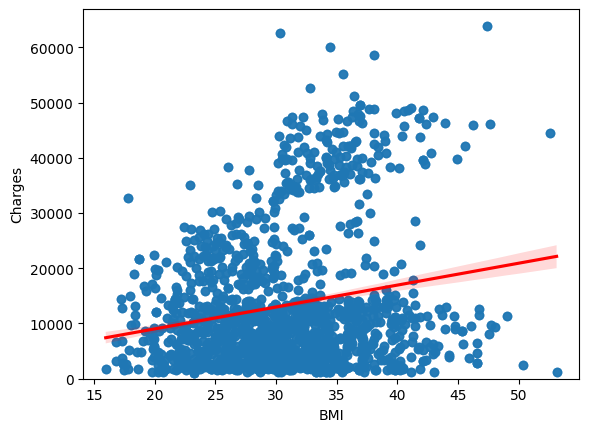

In [34]:
sns.regplot(x='BMI', y='Charges', data=df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='Smoker', ylabel='Charges'>

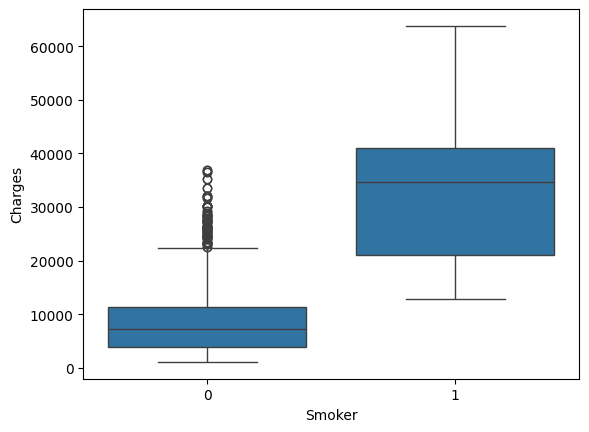

In [35]:
sns.boxplot(x='Smoker', y='Charges', data=df)

In [36]:
print(df.corr())

               Age    Gender       BMI  Children    Smoker    Region   Charges
Age       1.000000 -0.026046  0.113048  0.037574 -0.023286 -0.007167  0.298624
Gender   -0.026046  1.000000  0.042924  0.016020  0.082326  0.022213  0.062837
BMI       0.113048  0.042924  1.000000 -0.001492  0.011489  0.271119  0.199846
Children  0.037574  0.016020 -0.001492  1.000000  0.006362 -0.025717  0.066442
Smoker   -0.023286  0.082326  0.011489  0.006362  1.000000  0.054077  0.788783
Region   -0.007167  0.022213  0.271119 -0.025717  0.054077  1.000000  0.054058
Charges   0.298624  0.062837  0.199846  0.066442  0.788783  0.054058  1.000000


MODEL DEVELOPMENT

Fit a linear regression model that may be used to predict the charges value, just by using the smoker attribute of the dataset. Print the 
 R^2 score of this model.

In [42]:
# Linear Regression Model
X = df[['Smoker']]
Y = df['Charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6221791733924185


Fit a linear regression model that may be used to predict the charges value, just by using all other attributes of the dataset. Print the 
 R^2 score of this model. You should see an improvement in the performance.

In [44]:
# Definition of lm and Y still the same
Z = df[['Gender', 'Age', 'BMI', 'Children', 'Region']]
lm.fit(Z, Y)
print(lm.score(Z, Y))

0.12426185633470044


Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create a model that can predict the charges value using all the other attributes of the dataset. There should be even further improvement in the performance.

In [45]:
df.head()

,Age,Gender,BMI,Children,Smoker,Region,Charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


In [46]:
# Y and Z use the same value as before
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z, Y)
ypipe = pipe.predict(Z)
print('R2 score:', r2_score(Y, ypipe))


R2 score: 0.13742866985143898


MODEL REFINEMENT

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.

In [47]:
# Z and Y hold the same values as before
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)


Initialize a Ridge regressor that used hyperparameter 
. Fit the model using training data data subset. Print the 
 score for the testing data.

In [48]:
# x_train, x_test, y_train, y_test hold the same values as before
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print('Ridge R2 score:', r2_score(y_test, yhat))

Ridge R2 score: 0.08006811608292919


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the 
 score for the testing subset.

In [50]:
# x_train, x_test, y_train, y_test hold the same values as before
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print('Ridge with Polynomial Features R2 score:', r2_score(y_test, y_hat))

Ridge with Polynomial Features R2 score: 0.09249788299986883
